In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read data to DataFrame
df = pd.read_json('currencies.json')

In [3]:
#Let's get a sense of the data
df.head()

,date,day_close,day_high,day_low,day_market_cap,day_open,day_volume,long_name,market_rank,short_name
0,2019-04-09,0.358662,0.368276,0.341337,"210,789,830",0.349616,"25,531,764",0x,#38,(ZRX)
1,2019-04-08,0.349616,0.368514,0.338603,"205,422,221",0.356285,"25,068,719",0x,#38,(ZRX)
2,2019-04-09,0.000049,0.000049,0.000037,"1,296,018",0.000042,225,Elite,#1262,(1337)
3,2019-04-07,0.356219,0.368567,0.350586,"209,301,552",0.353494,"28,228,595",0x,#38,(ZRX)
4,2019-04-08,0.000042,0.000046,0.000039,"1,108,819",0.000043,162,Elite,#1262,(1337)


In [4]:
#DataFrame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667421 entries, 0 to 667420
Data columns (total 10 columns):
date              667421 non-null datetime64[ns]
day_close         667421 non-null object
day_high          667421 non-null object
day_low           667421 non-null object
day_market_cap    667421 non-null object
day_open          667421 non-null object
day_volume        667421 non-null object
long_name         667421 non-null object
market_rank       667421 non-null object
short_name        667421 non-null object
dtypes: datetime64[ns](1), object(9)
memory usage: 50.9+ MB


In [5]:
#Clean market rank variable
df['market_rank'] = (
df['market_rank']
    .str.replace('#','')
    .astype(int)
)

#Clean short name variable
df['short_name'] = (
df['short_name']
    .str.replace('(','')
    .str.replace(')','')
)

#Clean day close variable
df['day_close'] =  (
df['day_close']
    .str.replace(',','')
    .astype(float)
)

#Set date column as index
df = df.set_index('date')

#Check results
df.head()

,day_close,day_high,day_low,day_market_cap,day_open,day_volume,long_name,market_rank,short_name
date,,,,,,,,,
2019-04-09,0.358662,0.368276,0.341337,"210,789,830",0.349616,"25,531,764",0x,38,ZRX
2019-04-08,0.349616,0.368514,0.338603,"205,422,221",0.356285,"25,068,719",0x,38,ZRX
2019-04-09,0.000049,0.000049,0.000037,"1,296,018",0.000042,225,Elite,1262,1337
2019-04-07,0.356219,0.368567,0.350586,"209,301,552",0.353494,"28,228,595",0x,38,ZRX
2019-04-08,0.000042,0.000046,0.000039,"1,108,819",0.000043,162,Elite,1262,1337


In [6]:
#Sort DataFrame
df.sort_values(['market_rank', 'date'], ascending = [True, True], inplace = True)
df.head()

,day_close,day_high,day_low,day_market_cap,day_open,day_volume,long_name,market_rank,short_name
date,,,,,,,,,
2013-04-28,134.21,135.98,132.10,"1,488,566,728",135.30,-,Bitcoin,1,BTC
2013-04-29,144.54,147.49,134.00,"1,603,768,865",134.44,-,Bitcoin,1,BTC
2013-04-30,139.00,146.93,134.05,"1,542,813,125",144.00,-,Bitcoin,1,BTC
2013-05-01,116.99,139.89,107.72,"1,298,954,594",139.00,-,Bitcoin,1,BTC
2013-05-02,105.21,125.60,92.28,"1,168,517,495",116.38,-,Bitcoin,1,BTC


Autocorrelation investigation:

In [7]:
#Create Bitcoin and Ethereum series'
BTC = (
df
    .loc[df['short_name'] == 'BTC']
    .loc[:,'day_close']
)
ETH = (
df
    .loc[df['short_name'] == 'ETH']
    .loc[:,'day_close']
)

#Merge to new DataFrame
df_example = pd.DataFrame(columns = ['BTC', 'ETH'])
df_example['BTC'] = BTC
df_example['ETH'] = ETH
#Subset example DataFrame
df_example = df_example['2015-08-07':'2019-04-09']

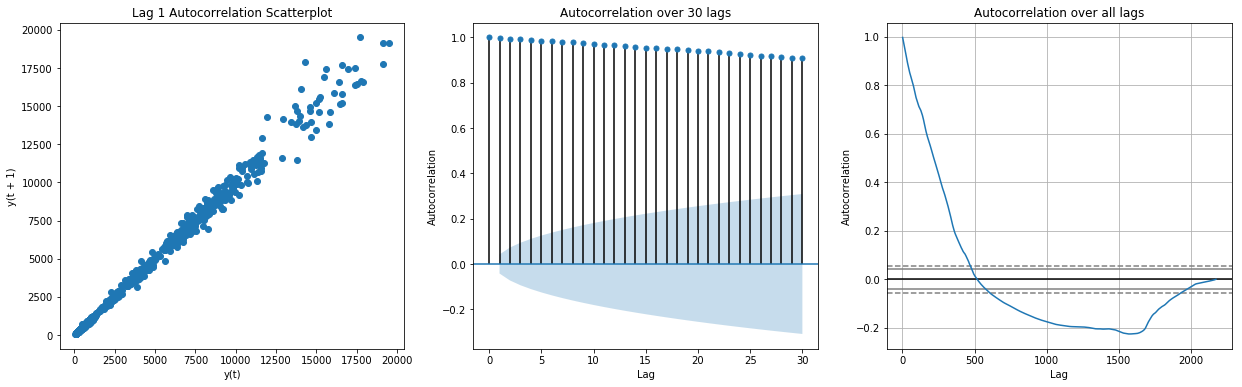

In [8]:
#Visualize Autocorrelation of Bitcoin prices
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(1,3, figsize = (21,6))
a1 = lag_plot(BTC, ax = ax[0])
ax[0].set_title('Lag 1 Autocorrelation Scatterplot')
a2 = plot_acf(BTC, lags = 30, ax = ax[1])
ax[1].set_title('Autocorrelation over 30 lags')
ax[1].set_ylabel('Autocorrelation')
ax[1].set_xlabel('Lag')
a3 = autocorrelation_plot(BTC, ax = ax[2])
ax[2].set_title('Autocorrelation over all lags')
plt.show()

Text(0.5, 1.0, 'Bitcoin and Ethereum prices')

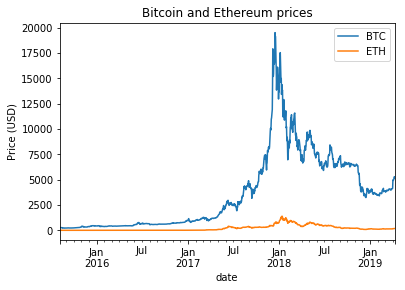

In [9]:
#Plot values
ax = df_example.plot()
ax.set_ylabel('Price (USD)')
ax.set_title('Bitcoin and Ethereum prices')

Text(0.5, 1.0, 'Bitcoin and Ethereum prices')

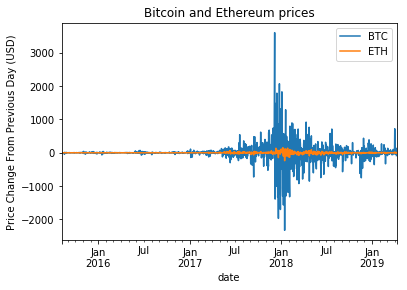

In [10]:
#Take first differences
df_example_diff =  df_example.diff()
df_example_dff = df_example_diff.dropna()
ax = df_example_diff.plot()
ax.set_ylabel('Price Change From Previous Day (USD)')
ax.set_title('Bitcoin and Ethereum prices')

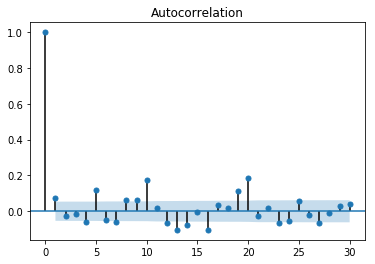

In [11]:
ax = plot_acf(df_example_dff.BTC, lags = 30)

Model building

D:\Users\Alex\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


predicted=4924.962275, expected=4973.020000
predicted=4904.386690, expected=4922.800000
predicted=4914.030954, expected=5036.680000
predicted=4926.661613, expected=5059.820000
predicted=5023.567958, expected=5198.900000
predicted=5016.788708, expected=5289.770000
predicted=4972.029040, expected=5204.960000
Test MSE: 27848.498


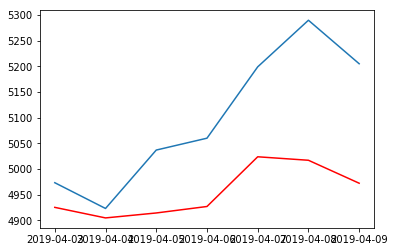

In [32]:
#Split dataset
train, test = BTC[1:len(BTC)-7], BTC[len(BTC)-7:]

#Train autoregression model
from statsmodels.tsa.ar_model import AR
model = AR(train, freq = 'D')
model_fit = model.fit()

#Make predictions and score results
from sklearn.metrics import mean_squared_error
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [37]:
#Split dataset
train = df_example[:len(df_example.index)-7]
test = df_example[len(df_example.index)-7:]

#Train autoregression model
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(train, freq = 'D')
model_fit = model.fit()

#Make predictions and score results
from sklearn.metrics import mean_squared_error
predictions = model_fit.forecast(model_fit.y, steps = len(test))